## Naive Bayes Klassifikator

### Definition

<img width="40%" class="imgright" src="../images/thomas_bayes_conditional_probability.webp" srcset="../images/thomas_bayes_conditional_probability_300w.webp 300w" alt="Thomas Bayes: Conditional Probability" />

Im Bereich des Machine Learnings ist ein Bayes Klassifikator ein einfacher probabilistischer Klassifikator, der auf dem Bayes' Theorem basiert. Das Feature-Model, dass von einem Naive Bayes Klassifikator verwendet wird, macht starke Unabhängigkeitsannahmen. Das bedeutet, dass die Existenz eines bestimmten Features einer Klasse unabhängig ist zur Existenz jedes anderen Features der Klasse.

Definition unabhängiger Ereignisse:

Zwei Ereignisse E und F sind unabhängig, wenn beide E und F positive Wahrscheinlichkeiten haben und wenn P(E|F) = P(E) und P(F|E) = P(F) ist.

Wie bereits erwähnt, basiert der Naive Bayes Klassifikator auf dem Bayes' Theorem. Das Bayes' Theorem basiert auf bedingten Wahrscheinlichkeiten, die wir jetzt definieren:

### Bedingte Wahrscheinlichkeit

$P(A|B)$ steht für "die bedingte Wahrscheinlichkeit von A mit gegebenen B", oder "die Wahrscheinlichkeit von A unter der Bedingung von B". Also die Wahrscheinlichkeit eines Ereignisses A unter der Annahme dass das Ereignis B eintritt. Wenn also in einem zufälligen Experiment das Ereignis B bekannt ist, werden die möglichen Ergebnisse des Experiments auf B reduziert, und daher wird die Wahrscheinlichkeit des Auftretens von A von der unbedingten Wahrscheinlichkeit in die bedingte Wahrscheinlichkeit von B geändert. Die gemeinsame Wahrscheinlichkeit ist die verbundene Wahrscheinlichkeit zweier Ereignisse. Es gibt drei Schreibweisen für die die gemeinsame Wahrscheinlichkeit von A und B.

- $P(A ∩ B)$ oder
- $P(AB)$ oder 
- $P(A,B)$

Die bedingte Wahrscheinlichkeit wird wie folgt definiert:

$$P(A|B) = \frac{P( A ∩ B)}{P(B)}$$ 

### Beispiele zur bedingten Wahrscheinlichkeit

#### Deutsch sprechende Schweizer

Es leben über 8,4 Millionen Menschen in der Schweiz. Über 64% davon sprechen Deutsch.
Auf der Erde leben insgesamt über 7,5 Milliarden Menschen.

Wenn Aliens einen Menschen auf der zufällig "wegbeamen" würden, wie hoch wäre die Wahrscheinlichkeit, dass es sich dabei um einen deutsch sprechenden Schweizer handelt?


Wir haben also folgende Ereignisse:
- S: ist ein Schweizer
- GS: spricht Deutsch

Die Wahrscheinlichkeit für einen zufällig ausgewählten Schweizer:

$$P(S) = \frac{8.4}{7500} = 0.00112 $$

Wenn wir wissen, dass jemand Schweizer ist, so liegt die Wahrscheinlichkeit für einen deutsch sprechenden Schweizer bei 0.64 (64%). Dass entspricht der bedingten Wahrscheinlichkeit: $$P(GS | S) = 0.64$$

Mit folgender Formel berechnen wir also die Wahrscheinlichkeit dafür, dass es sich bei dem Erdling um einen deutsch sprechenden Schweizer handelt:

$$P(GS | S) = \frac{P(GS ∩ S)}{P(S)}$$

Setzen wir noch die Werte ein:

$$0.64 = \frac{P(GS ∩ S)}{0.00112}$$

Ergebnis:

$$P(GS ∩ S) = 0.0007168$$

Unsere Aliens bekommen also mit einer Change von 0,07168% einen deutsch sprechenden Schweizer.

####  Falsche Positive und Falsche Negative

Ein medizinisches Forschungs-Labor schlägt vor eine große Gruppe von Menschen hinsichtlich einer Erkrankung mit einem Screening zu testen. Ein Argument gegen das Screening ist das Problem von falschen Positiv Ergebnissen.

Angenommen dass 0,1% der Gruppe von der Erkrankung betroffen sind und der Rest gesund ist:
$$P("sick") = 0,1 \% = 0.01$$
und
$$P("well") = 99,9 \% = 0.999$$

Folgendes ist wahr für ein Screening:
Wenn Sie die Krankheit haben, so wird der Test in 99% der Fälle Positiv sein. Sollten Sie die Krankheit nicht haben, so wird der Test in 99% Negativ sein:

$$P("test positive" | "well") = 1 \%$$

und 

$$P("test negative" | "well") = 99 \%$$

Angenommen, dass Screening wird an einer Person durchgeführt die erkrankt ist, so gibt es eine Chance von 1% für ein falsches Negativ Ergebnis (und eine Chance von 99% für ein korrektes Positiv Ergebnis):

$$P("test negative" | "sick") = 1 \%$$

und 

$$P("test positive" | "sick") = 99 \%$$

Es gibt also 999 falsche Positiv Ergebnisse und 1 falsches Negativ Ergebnis.

**Problem:**

In vielen Fällen nehmen sogar medizinische Fachkräfte an, dass der Test zu 99% positiv ist, wenn die Krankheit vorhanden ist und zu 99% negativ, wenn die Krankheit nicht vorhanden ist. Von den 1098 Fällen die ein positives Ergebnis liefern sind nur 99 (9%) Fälle korrekt und 999 Fälle sind falsche Positiv Ergebnisse (91%). Wenn eine Person also ein positives Test-Ergebnis bekommt, liegt die Wahrscheinlichkeit bei etwa 9% dass Er oder Sie tatsächlich die Krankheit hat. 

$$P("sick" | "test positive") = 99 / 1098 = 9.02 \%$$

### Bayes' Theorem

Wir haben die bedingte Wahrscheinlichkeit $P(GS | S)$ berechnet. Dabei ging es um die Wahrscheinlichkeit dass eine Person Deutsch spricht, wenn er bekannterweise ein Schweizer ist. Mit folgender Gleichung können wir dies berechnen:

$$P(GS | S) = \frac{P(GS, S)}{P(S)}$$ 

Wie sieht es mit der Berechnung der Wahrscheinlichkeit $P(S | GS)$ aus, also der Wahrscheinlichkeit dass jemand Schweizer ist unter der Annahme dass er Deutsch spricht?

Die Gleichung sieht so aus:

$$P(S| GS) = \frac{P(GS, S)}{P(GS)}$$ 

Isolieren wir aus beiden Gleichungen $P(GS, S)$:

$$P(GS, S) =  P(GS | S) P(S)$$

$$P(GS, S) =  P(S | GS) P(GS)$$

So wie die linken Seiten gleich sind, sollten die rechten Seiten ebenfalls gleich sein:

$$P(GS | S) * P(S) =  P(S | GS)  P(GS)$$

Diese Gleichung kann auch so geschrieben werden:

$$P(S | GS) = \frac{P(GS | S) P(S)}{P(GS)}$$

Das Ergebnis entspricht dem **Bayes' Theorem**.

Um das Problem zu lösen - also die Wahrscheinlichkeit dass ein Person Schweizer ist, wenn wir wissen dass er Deutsch spricht - müssen wir lediglich die rechte Seite berechnen. Aus dem vorigen Beispiel kennen wir bereits
$$P(GS | S) = 0.64$$

und 

$$P(S) = 0.00112 $$

Die Anzahl der nativ Deutsch sprechenden Menschen auf der Welt entspricht etwa 101 Millionen, somit kennen wir

$$P(GS) = \frac{101}{7500} = 0.0134667 $$

Schließlich setzen wir die Werte in die Gleichung ein und berechnen $P(S | GS)$:

$$P(S | GS) = \frac{P(GS | S)  P(S)}{ P(GS)} = \frac{0.64 * 0.00112}{0.0134667} = 0.0532276$$


Es leben über 8,4 Millionen Menschen in der Schweiz. Über 64% davon sprechen Deutsch.
Auf der Erde leben insgesamt über 7,5 Milliarden Menschen.

Wenn Aliens einen Menschen auf der zufällig "wegbeamen" würden, wie hoch wäre die Wahrscheinlichkeit, dass es sich dabei um einen deutsch sprechenden Schweizer handelt?


Wir haben also folgende Ereignisse:
- S: ist ein Schweizer
- GS: spricht Deutsch

Die Wahrscheinlichkeit für einen zufällig ausgewählten Schweizer:

$$P(S) = \frac{8.4}{7500} = 0.00112 $$

$$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$$

$P(A|B)$ ist die bedingte Wahrscheinlichkeit von $A$ und $B$ ist gegeben (posteriore Wahrscheinlichkeit). $P(B)$ ist die vorherige Wahrscheinlichkeit von $B$ und $P(A)$ entspricht der vorherigen Wahrscheinlichkeit von $A$. $P(B|A)$ ist die bedingte Wahrscheinlichkeit von $B$ bei gegebenen $A$, auch "likely-hood" genannt.

Ein Vorteil des Naive Bayes Klassifikators ist, dass nur eine kleine Anzahl an Trainings-Daten notwendig ist um die Parameter abzuschätzen, die für die Klassifizierung notwendig sind. Da unabhängige Variablen angenommen werden, müssen nur die Varianzen der Variablen für jede Klasse bestimmt werden und nicht die gesamte Kovarianzmatrix.

## Naive Bayes Klassifikator

### Einführungsübung

<img width="50%" class="imgright" src="../images/hamburg_station.webp" srcset="../images/hamburg_station_300w.webp 300w" alt="Main Railway station in Hamburg" />

Begeben wir uns auf eine Zug-Reise um unseren ersten einfachen Naive Bayes Klassifikator zu erstellen. Nehmen wir an, dass wir uns in Hamburg befinden und nach München reisen möchten. In Frankfurt am Main müssen wir umsteigen. Von früheren Zug-Reisen wissen wir, dass unser Zug von Hamburg sich verspäten wird und somit nicht genügend Zeit bleibt um den Anschluss-Zug in Frankfurt zu bekommen. Die Wahrscheinlichkeit, dass wir den Anschluss-Zug verpassen werden hängt davon ab, wie hoch die mögliche Verspätung sein wird. Der Anschluss-Zug wird nicht länger als 5 Minuten warten. Manchmal hat der Anschluss-Zug aber ebenfalls Verstpätung.

Folgende Listen <code>in_time</code> (der Zug aus Hamburg ist pünktlich um den Anschluss-Zug nach München zu bekommen) und <code>too_late</code> (Anschluss-Zug verpasst) zeigen die Situation über einige Wochen. Die erste Komponente jedes Tuple stellt die Minuten dar, die der Zug zu spät angekommen ist und die zweite Komponente enthält die Anzahl der Vorkommnisse dazu.

In [15]:
# Tuple enthalten (Verspätung in Minuten, Anzahl der Verspätungen)
in_time = [(0, 22), (1, 19), (2, 17), (3, 18),
           (4, 16), (5, 15), (6, 9), (7, 7),
           (8, 4), (9, 3), (10, 3), (11, 2)]
too_late = [(6, 6), (7, 9), (8, 12), (9, 17), 
            (10, 18), (11, 15), (12,16), (13, 7),
            (14, 8), (15, 5)]

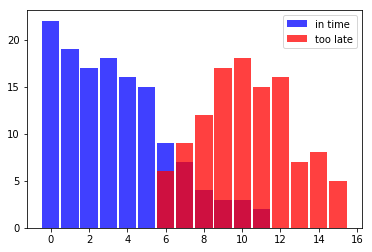

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

X, Y = zip(*in_time)

X2, Y2 = zip(*too_late)

bar_width = 0.9
plt.bar(X, Y, bar_width,  color="blue", alpha=0.75, label="in time")
bar_width = 0.9
plt.bar(X2, Y2, bar_width,  color="red", alpha=0.75, label="too late")
plt.legend(loc='upper right')
plt.show()

Aus diesen Daten können wir die Wahrscheinlichkeit dafür ableiten, wenn wir eine Minute zu spät sind und den Anschluss-Zug bekommen wollen. Denn wir haben 19 erfolgreiche Fälle und keinen verpassten Fall. Es gibt also kein Tuple in der Liste <code>too_late</code>, in dem als erste Komponente eine 1 enthalten ist. 

Dieses Ereignis "Zug ist pünktlich angekommen um den Anschluss-Zug zu erreichen" bezeichnen wir mit $S$ (success) und das unglückliche Ereignis "Zug ist zu spät um den Anschluss-Zug zu bekommen" mit $M$ (miss).

Wir können jetzt die Wahrscheinlichkeit formal definieren für "Zug bekommen, wenn wir eine Minute zu spät sind":

$$P(S | 1) = 19 / 19 = 1$$

Wir haben den Fakt genutzt, dass das Tuple $(1, 19)$ in <code>in_time</code> ist und es kein Tupel in der Liste <code>too_late</code> gibt mit 1 als erste Komponente.

Es wird kritisch wenn wir den Zug nach München wollen, aber 6 Minuten zu spät sind. Jetzt liegt die Chance nur noch bei 60%:

$$P(S | 6) = 9 / 9 + 6 = 0.6$$

Entsprechend liegt die Wahrscheinlichkeit den Zug zu verpassen, wenn wir 6 Minuten zu spät sind, bei:

$$P(S | 6) = 6 / 9 + 6 = 0.4$$

Wir können eine Klassifikator-Funktion schreiben, die uns die Wahrscheinlichkeit ausgibt, für die Erreichung des Anschluss-Zuges:

In [17]:
in_time_dict = dict(in_time)
too_late_dict = dict(too_late)

def catch_the_train(min):
    s = in_time_dict.get(min, 0)
    if s == 0:
        return 0
    else:
        m = too_late_dict.get(min, 0)
        return s / (s + m)

for minutes in range(-1, 13):
    print(minutes, catch_the_train(minutes))
        


-1 0
0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 0.6
7 0.4375
8 0.25
9 0.15
10 0.14285714285714285
11 0.11764705882352941
12 0


### Ein Naive Bayes Klassifikator Beispiel

#### Daten vorbereiten

Wir verwenden die Datei <code>person_data.txt</code>. Sie enthält 100 zufällige Personen-Daten, männlich und weiblich, mit Körpergrößen, Gewicht und Geschlechts-Informationen.

In [18]:
import numpy as np

genders = ["male", "female"]
persons = []
with open("data/person_data.txt") as fh:
    for line in fh:
        persons.append(line.strip().split())

firstnames = {}
heights = {}

for gender in genders:
    firstnames[gender] = [ x[0] for x in persons if x[4]==gender]
    heights[gender] = [ x[2] for x in persons if x[4]==gender]
    heights[gender] = np.array(heights[gender], np.int)
    
for gender in ("female", "male"):
    print(gender + ":")
    print(firstnames[gender][:10])
    print(heights[gender][:10])

female:
['Stephanie', 'Cynthia', 'Katherine', 'Elizabeth', 'Carol', 'Christina', 'Beverly', 'Sharon', 'Denise', 'Rebecca']
[149 174 183 138 145 161 179 162 148 196]
male:
['Randy', 'Jessie', 'David', 'Stephen', 'Jerry', 'Billy', 'Earl', 'Todd', 'Martin', 'Kenneth']
[184 175 187 192 204 180 184 174 177 200]


Warnung: Es könnte eine Verwechslung geben zwischen einer Python-Klasse und einer Naive Bayes-Klasse geben. Wir versuchen an den entsprechenden Stellen explizit zu erwähnen, was gemeint ist.

#### Design einer Feature-Klasse

Wir definieren jetzt eine Python-Klasse <code>Feature</code> für die Features, die wir für die spätere Klassifikation brauchen.

Die Feature-Klasse braucht eine Bezeichnung (label), z.B. "Körpergrößen" oder "Vornamen".
Wenn die Feature-Werte numerisch sind, könnten wir sie vielleicht auch auf die möglichen Feature-Werte reduzieren. Die Körpergrößen der Personen haben einen großen Wertebereich und wir haben lediglich 50 gemessene Werte für unsere Naive Bayes-Klasse "male" und "female". Wir setzen <code>bin_width</code> auf 5 und somit die Wertebereiche "130 bis 134", "135 bis 139", "140 bis 144", und so weiter. Vornamen können wir nicht zusammenfassen und somit setzen wir <code>bin_width</code> auf <code>None</code>.

Die Methode <code>frequency</code> liefert die Anzahl der Vorkommnisse für ein bestimmtes Feature oder zusammengefassten Wertebreich.

In [19]:
from collections import Counter
import numpy as np

class Feature:
    
    def __init__(self, data, name=None, bin_width=None):
        self.name = name
        self.bin_width = bin_width
        if bin_width:
            self.min, self.max = min(data), max(data)
            bins = np.arange((self.min // bin_width) * bin_width, 
                             (self.max // bin_width) * bin_width,
                             bin_width)
            freq, bins = np.histogram(data, bins)
            self.freq_dict = dict(zip(bins, freq))
            self.freq_sum = sum(freq)
        else:
            self.freq_dict = dict(Counter(data))
            self.freq_sum = sum(self.freq_dict.values())
    
    def frequency(self, value):
        if self.bin_width:
            value = (value // self.bin_width) * self.bin_width
        if value in self.freq_dict:
            return self.freq_dict[value]
        else:
            return 0

Erstellen wir jetzt zwei Feature-Instanzen für die Körpergrößen des Personen-Data-Sets. Eine Feature-Instanz beinhaltet die Körpergrößen für die Naive Bayes-Klasse "male" und die andere Instanz die Körpergrößen für die Naive Bayes-Klasse "female":

In [20]:
fts = {}
for gender in genders:
    fts[gender] = Feature(heights[gender], name=gender, bin_width=5)
    print(gender, fts[gender].freq_dict)

male {155: 1, 160: 5, 165: 4, 170: 6, 175: 7, 180: 5, 185: 8, 190: 8, 195: 2, 200: 3}
female {130: 1, 135: 1, 140: 0, 145: 3, 150: 5, 155: 7, 160: 8, 165: 11, 170: 7, 175: 2, 180: 4, 185: 0}


#### Balken-Diagramm zur Frequenzverteilung

Wir haben die Frequenzen der Features ausgegeben, jedoch ist die Darstellung in einem Balken-Diagramm deutlich besser. Mit folgendem Code generieren wir eine entsprechende Ausgabe:

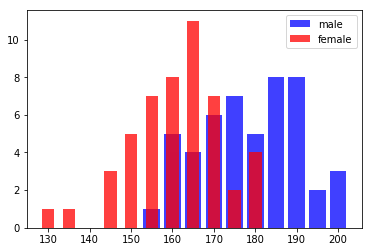

In [21]:
for gender in genders:
    frequencies = list(fts[gender].freq_dict.items())
    frequencies.sort(key=lambda x: x[1])
    X, Y = zip(*frequencies)
    color = "blue" if gender=="male" else "red"
    bar_width = 4 if gender=="male" else 3
    plt.bar(X, Y, bar_width, color=color, alpha=0.75, label=gender)


plt.legend(loc='upper right')
plt.show()

Nun muss eine Naive Bayes-Klasse in Python erstellt werden. Wir nennen sie <code>NBclass</code>. Eine <code>NBclass</code>-Instanz beinhaltet eine oder mehrere <code>Feature</code>-Instanzen. Die Bezeichnung der <code>NBclass</code> wird in <code>self.name</code> abgelegt.

In [22]:
class NBclass:
        
        def __init__(self, name, *features):
            self.features = features
            self.name = name
            
        def probability_value_given_feature(self, 
                                            feature_value,
                                            feature):
            """
            p_value_given_feature liefert die Wahrscheinlichkeit p
            für ein feature_value 
            
            Ich versteh den Satz nicht!!!
            
            p_value_given_feature returns the probability p 
            for a feature_value 'value' of the feature  to occurr
            corresponds to P(d_i | p_j)
            where d_i is a feature variable of the feature i
            """
            
            if feature.freq_sum == 0:
                return 0
            else:
                return feature.frequency(feature_value) / feature.freq_sum

Folgender Code erzeugen wir <code>NBclass</code>-Instanzen mit einem Feature, d.h. den Körpergrößen-Feature.
Wir verwenden die <code>Feature</code>-Instanzen von <code>fts</code>, die wir schon vorher erstellt haben:

In [23]:
cls = {}
for gender in genders:
    cls[gender] = NBclass(gender, fts[gender])

Der letzte Schritt für einen einfachen Naive Bayes-Klassifikator ist eine Klasse <code>Classifier</code>, die wiederum die Klassen <code>NBclass</code> und <code>Feature</code> verwendet.

In [24]:
class Classifier:
    
    def __init__(self, *nbclasses):
        self.nbclasses = nbclasses

    def prob(self, *d, best_only=True):
        
        nbclasses = self.nbclasses
        probability_list = []
        
        for nbclass in nbclasses:            
            ftrs = nbclass.features
            prob = 1
            
            for i in range(len(ftrs)):
                prob *= nbclass.probability_value_given_feature(d[i], ftrs[i])
                
            probability_list.append( (prob, nbclass.name) )
            
        prob_values = [f[0] for f in probability_list]
        prob_sum = sum(prob_values)
        
        if prob_sum==0:
            number_classes = len(self.nbclasses)
            pl = []
            
            for prob_element in probability_list:
                pl.append( ((1 / number_classes), prob_element[1]))
                
            probability_list = pl
            
        else:
            probability_list = [ (p[0] / prob_sum, p[1])  for p in probability_list]
            
        if best_only:
            return max(probability_list)
        
        else:
            return probability_list

Wir erstellen einen Klassifikator mit einer <code>Feature</code>-Instanz 'Körpergrößen'. Wir prüfen die Werte zwischen 130 und 220 cm.

In [25]:
c = Classifier(cls["male"], cls["female"])

for i in range(130, 220, 5):
    print(i, c.prob(i, best_only=False))

130 [(0.0, 'male'), (1.0, 'female')]
135 [(0.0, 'male'), (1.0, 'female')]
140 [(0.5, 'male'), (0.5, 'female')]
145 [(0.0, 'male'), (1.0, 'female')]
150 [(0.0, 'male'), (1.0, 'female')]
155 [(0.125, 'male'), (0.875, 'female')]
160 [(0.3846153846153847, 'male'), (0.6153846153846154, 'female')]
165 [(0.26666666666666666, 'male'), (0.7333333333333333, 'female')]
170 [(0.4615384615384616, 'male'), (0.5384615384615385, 'female')]
175 [(0.7777777777777778, 'male'), (0.22222222222222224, 'female')]
180 [(0.5555555555555556, 'male'), (0.4444444444444445, 'female')]
185 [(1.0, 'male'), (0.0, 'female')]
190 [(1.0, 'male'), (0.0, 'female')]
195 [(1.0, 'male'), (0.0, 'female')]
200 [(1.0, 'male'), (0.0, 'female')]
205 [(0.5, 'male'), (0.5, 'female')]
210 [(0.5, 'male'), (0.5, 'female')]
215 [(0.5, 'male'), (0.5, 'female')]


Es gibt keine Personen - weder männlich noch weiblich -  in unserem Lern-Set, mit einer Körpergröße zwischen 140 und 144 cm. Deshalb kann der Klassifikator nicht auf gelernte Daten aus diesem Wertebereich zugreifen und wir bekommen ein 50-50-Ergebnis.

Wir können den Klassifikator ebenfalls mit unseren Vornamen trainieren:

In [26]:
fts = {}
cls = {}
for gender in genders:
    fts_names = Feature(firstnames[gender], name=gender)
    cls[gender] = NBclass(gender, fts_names)
    
c = Classifier(cls["male"], cls["female"])

testnames = ['Edgar', 'Benjamin', 'Fred', 'Albert', 'Laura', 
             'Maria', 'Paula', 'Sharon', 'Jessie']
for name in testnames:
    print(name, c.prob(name, best_only=False))

Edgar [(0.5, 'male'), (0.5, 'female')]
Benjamin [(1.0, 'male'), (0.0, 'female')]
Fred [(1.0, 'male'), (0.0, 'female')]
Albert [(1.0, 'male'), (0.0, 'female')]
Laura [(0.0, 'male'), (1.0, 'female')]
Maria [(0.0, 'male'), (1.0, 'female')]
Paula [(0.0, 'male'), (1.0, 'female')]
Sharon [(0.0, 'male'), (1.0, 'female')]
Jessie [(0.33333333333333337, 'male'), (0.6666666666666667, 'female')]


Der Name "Jessie" ist mehrdeutig. Es gibt 66 Jungs und 100 Mädchen mit diesem Namen. Aus dem vorherigen Klassifikations-Ergebnis lernen wir, dass die Wahrscheinlichkeit bei über zwei-drittel für "female" liegt, was durch unser Daten-Set <code>person</code> errechnet wurde:

In [27]:
[person for person in persons if person[0] == "Jessie"]

[['Jessie', 'Morgan', '175', '67.0', 'male'],
 ['Jessie', 'Bell', '165', '65', 'female'],
 ['Jessie', 'Washington', '159', '56', 'female'],
 ['Jessie', 'Davis', '174', '45', 'female'],
 ['Jessie', 'Johnson', '165', '30.0', 'male'],
 ['Jessie', 'Thomas', '168', '69', 'female']]

Jessie Washington ist nur 159 cm groß. Schauen wir uns die Ergebnisse des Klassifikators an, der mit Körpergrößen trainiert wurde, erkennen wir dass die Wahrscheinlichkeit dafür, dass eine 159 cm große Person weiblich ist, bei 0.875 liegt. Was ist mit einer unbekannten Person die "Jessie" heisst und 159 cm groß ist? Ist sie männlich oder weiblich?

Dafür trainieren wir einen Naive Bayes-Klassifikator mit zwei <code>Feature</code>-Instanzen, d.h. mit Körpergrößen und Vornamen:

In [28]:
cls = {}
for gender in genders:
    fts_heights = Feature(heights[gender], name="heights", bin_width=5)
    fts_names = Feature(firstnames[gender], name="names")

    cls[gender] = NBclass(gender, fts_names, fts_heights)


c = Classifier(cls["male"], cls["female"])

for d in [("Maria", 140), ("Anthony", 200), ("Anthony", 153), 
          ("Jessie", 188) , ("Jessie", 159), ("Jessie", 160) ]:
    print(d, c.prob(*d, best_only=False))
    

('Maria', 140) [(0.5, 'male'), (0.5, 'female')]
('Anthony', 200) [(1.0, 'male'), (0.0, 'female')]
('Anthony', 153) [(0.5, 'male'), (0.5, 'female')]
('Jessie', 188) [(1.0, 'male'), (0.0, 'female')]
('Jessie', 159) [(0.06666666666666667, 'male'), (0.9333333333333333, 'female')]
('Jessie', 160) [(0.23809523809523817, 'male'), (0.761904761904762, 'female')]


### Die grundlegende Theorie

Unser Klassifikator basiert auf dem Bayes' Theorem:

Our classifier from the previous example is based on the Bayes theorem:

$$P(c_j | d) = \frac{P(d | c_j) P(c_j)}{P(d)}$$

dabei gilt

- $P(c_j | d)$ ist die Wahrscheinlichkeit einer Instanz d in der Klasse c_j zu sein. Dass wollen wir mit unserem Klassifikator berechnen.

- $P(d | c_j)$ ist die Wahrscheinlichkeit zur Generierung der Instanz d, wenn die Klasse $c_j$ gegeben ist.

- $P(c_j)$ ist die Wahrscheinlichkeit für das Vorkommen der Klasse $c_j$. Wir verwenden dies aber nicht in unserem Klassifikator, weil beide Klassen in unserem Beispiel gleichermaßen wahrscheinlich sind.

- $P(d)$ ist die Wahrscheinlichkeit für das Vorkommen einer Instanz d. Dies wird in der Berechnung nicht benötigt, da dies für alle Klassen gleich ist.

Wir haben lediglich ein Feature in unserem vorigen Beispiel verwendet, d.h. sowohl die Körpergrößen als auch die Vornamen.

Es ist möglich einen Naive Bayes Klassifikator zu definieren mit mehreren <code>Feature</code>-Instanzen. z.B. $d = (d_1, d_2, ..., d_n)$

Wir erhalten dadurch folgende Formel:

$$P(c_j | d) = \frac{1}{P(d)} \displaystyle \prod_{i=1}^{n}  P( d_i | c_j) P(c_j)$$

$\frac{1}{P(d)}$ hängt nur von den Werten $d_1, d_2, ... d_n$ ab. Es handelt sich dabei um eine Konstante, weil die Werte der Feature-Variablen bekannt sind.